In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/notebooks/mohamedamineferrag/edge-iiotset-pre-processing/__results__.html
/kaggle/input/notebooks/mohamedamineferrag/edge-iiotset-pre-processing/__resultx__.html
/kaggle/input/notebooks/mohamedamineferrag/edge-iiotset-pre-processing/__notebook__.ipynb
/kaggle/input/notebooks/mohamedamineferrag/edge-iiotset-pre-processing/__output__.json
/kaggle/input/notebooks/mohamedamineferrag/edge-iiotset-pre-processing/custom.css


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/datasets/mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot


In [2]:
cd /kaggle/input/datasets/mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot


/kaggle/input/datasets/mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot


In [3]:
ls

'Edge-IIoTset dataset'/   Edge_IIoTset__DatasetFL.pdf   Readme.txt


In [4]:
# Cell: Explore dataset folder
import os

base_path = '/kaggle/input/datasets/mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/'

for dirname, dirs, filenames in os.walk(base_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/datasets/mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/Uploading attack.pcap
/kaggle/input/datasets/mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/DDoS_ICMP_Flood_attack.csv
/kaggle/input/datasets/mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/DDoS_TCP_SYN_Flood_attack.csv
/kaggle/input/datasets/mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/MITM (ARP spoofing + DNS) Attack.pcap
/kaggle/input/datasets/mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/Uploading_attack.csv
/kaggle/input/datasets/mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/XSS_attack.csv
/kaggle/input/datasets/mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIo

In [5]:
# Cell 2: Load ML Dataset & Basic Exploration
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

ML_PATH = '/kaggle/input/datasets/mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Selected dataset for ML and DL/ML-EdgeIIoT-dataset.csv'

# Load dataset
print("Loading dataset...")
df = pd.read_csv(ML_PATH, low_memory=False)

print(f"✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nColumns ({len(df.columns)}):\n{list(df.columns)}")
print(f"\nTarget column value counts:")
print(df['Attack_type'].value_counts())
print(f"\nMissing values: {df.isnull().sum().sum()}")
print(f"\nData types:\n{df.dtypes.value_counts()}")

Loading dataset...
✅ Dataset loaded successfully!
Shape: (157800, 63)

Columns (63):
['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4', 'arp.opcode', 'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum', 'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused', 'http.file_data', 'http.content_length', 'http.request.uri.query', 'http.request.method', 'http.referer', 'http.request.full_uri', 'http.request.version', 'http.response', 'http.tls_port', 'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack', 'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.options', 'tcp.payload', 'tcp.seq', 'tcp.srcport', 'udp.port', 'udp.stream', 'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu', 'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request', 'dns.retransmit_request_in', 'mqtt.conack.flags', 'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg

In [6]:
# Cell 3: Data Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Drop non-numeric/irrelevant columns
drop_cols = ['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4',
             'arp.src.proto_ipv4', 'http.file_data', 'http.request.uri.query',
             'http.referer', 'http.request.full_uri', 'tcp.options', 'tcp.payload',
             'tcp.flags', 'dns.qry.name', 'mqtt.msg_decoded_as', 'mqtt.msg',
             'mqtt.protoname', 'mqtt.topic']

df_clean = df.drop(columns=drop_cols, errors='ignore')
print(f"After dropping irrelevant cols: {df_clean.shape}")

# Step 2: Encode remaining object columns
obj_cols = df_clean.select_dtypes(include='object').columns.tolist()
obj_cols = [c for c in obj_cols if c not in ['Attack_label', 'Attack_type']]
print(f"Object columns to encode: {obj_cols}")

le = LabelEncoder()
for col in obj_cols:
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))

# Step 3: Encode target
df_clean['Attack_label'] = le.fit_transform(df_clean['Attack_label'])  # 0=Normal, 1=Attack

# Step 4: Features & Target
X = df_clean.drop(columns=['Attack_type', 'Attack_label'])
y = df_clean['Attack_type']  # Multiclass

print(f"\nFeature shape: {X.shape}")
print(f"Target classes: {y.nunique()}")

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTrain size: {X_train.shape}")
print(f"Test size: {X_test.shape}")

# Step 6: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Preprocessing complete!")

After dropping irrelevant cols: (157800, 46)
Object columns to encode: ['http.request.method', 'http.request.version', 'tcp.srcport', 'dns.qry.name.len', 'mqtt.conack.flags']

Feature shape: (157800, 44)
Target classes: 15

Train size: (126240, 44)
Test size: (31560, 44)

✅ Preprocessing complete!


In [7]:
# Cell 4: Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import time

print("🚀 Training Random Forest Classifier...")
print("(This may take 3-5 minutes, please wait...)\n")

start_time = time.time()

# Train model (100 trees as per project requirement)
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    n_jobs=-1,        # Use all CPU cores
    random_state=42,
    verbose=1
)

rf_model.fit(X_train_scaled, y_train)

train_time = time.time() - start_time
print(f"\n✅ Training completed in {train_time:.2f} seconds")

# Evaluate
print("\n📊 Evaluating model...")
y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Accuracy: {accuracy * 100:.2f}%")
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

🚀 Training Random Forest Classifier...
(This may take 3-5 minutes, please wait...)



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished



✅ Training completed in 5.07 seconds

📊 Evaluating model...

🎯 Accuracy: 95.62%

📋 Classification Report:
                       precision    recall  f1-score   support

             Backdoor       1.00      0.97      0.99      2039
            DDoS_HTTP       0.82      0.90      0.86      2112
            DDoS_ICMP       1.00      1.00      1.00      2818
             DDoS_TCP       1.00      1.00      1.00      2050
             DDoS_UDP       1.00      1.00      1.00      2900
       Fingerprinting       1.00      0.83      0.91       200
                 MITM       1.00      1.00      1.00       243
               Normal       1.00      1.00      1.00      4860
             Password       0.94      0.83      0.88      1998
        Port_Scanning       0.93      0.96      0.95      2014
           Ransomware       0.94      0.95      0.95      2185
        SQL_injection       0.90      0.90      0.90      2062
            Uploading       0.96      0.89      0.92      2054
Vulnerabil

✅ Model, scaler & feature names saved!


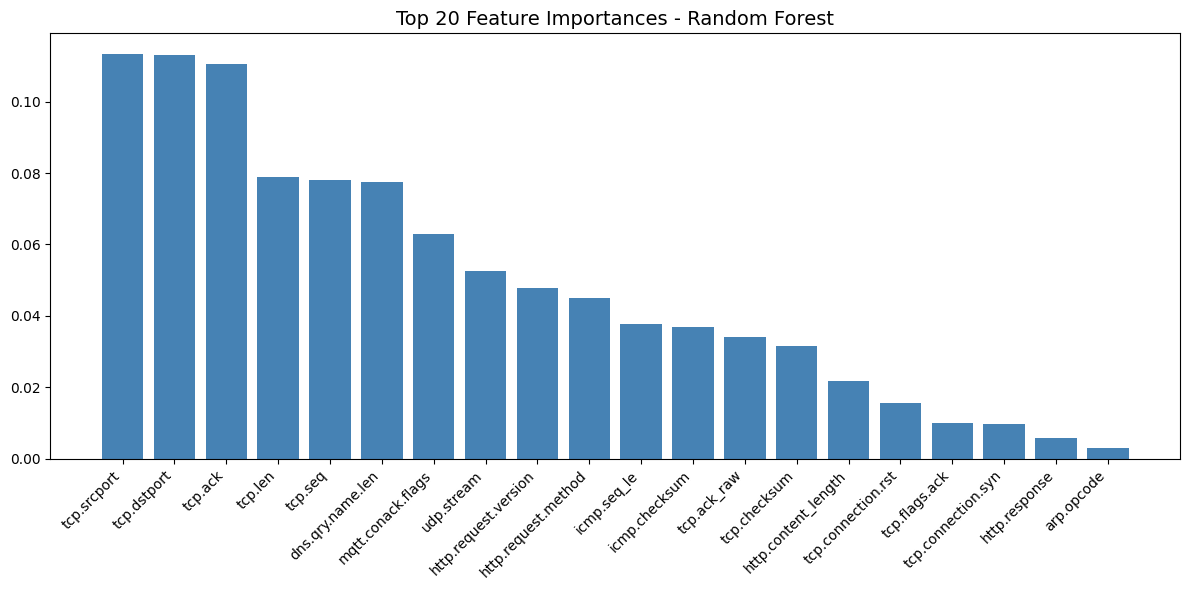

✅ Feature importance plot saved!


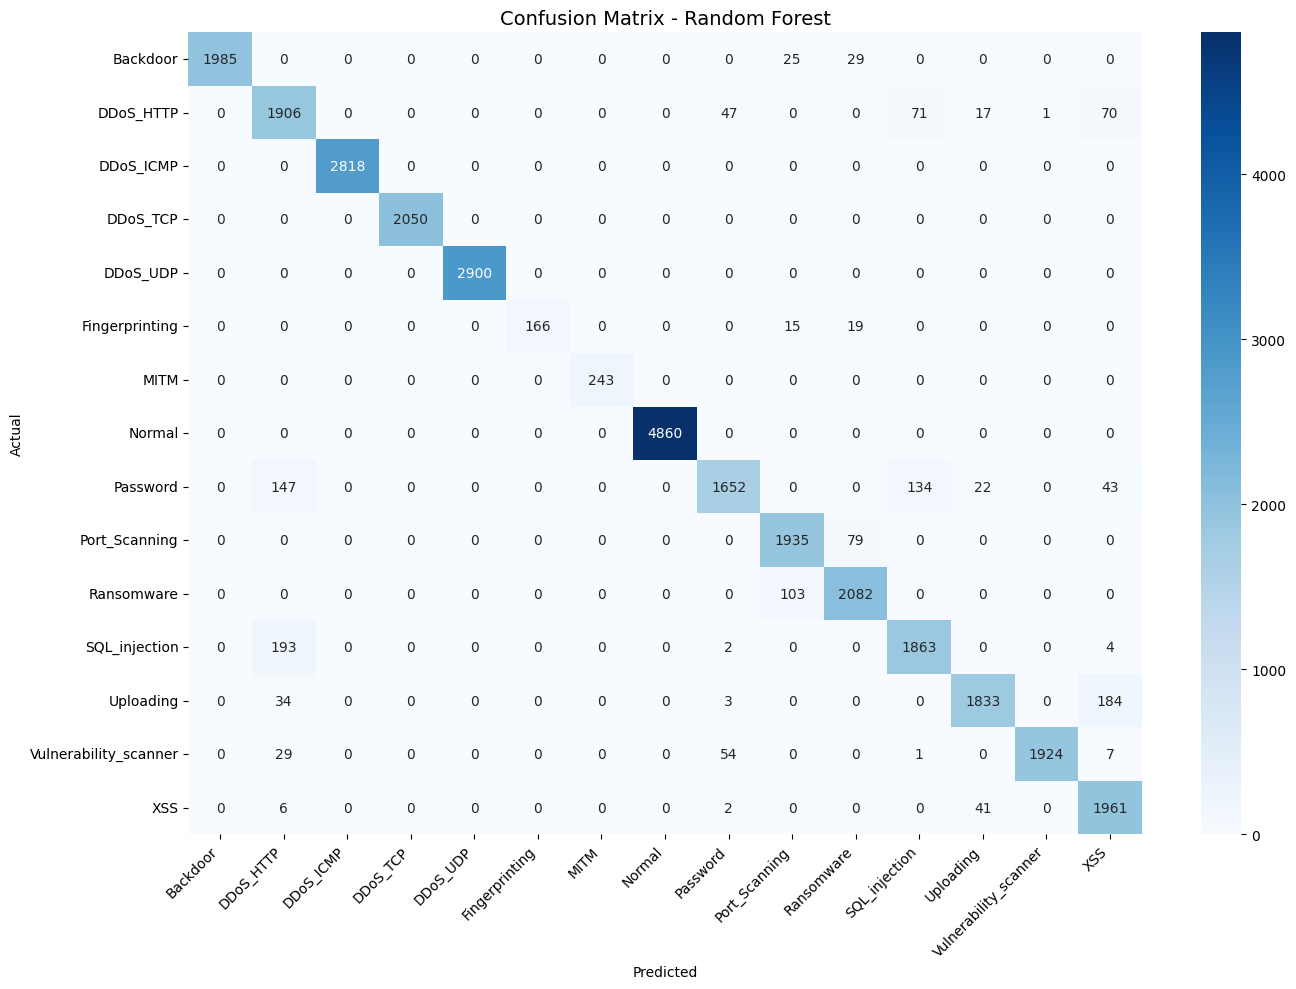

✅ Confusion matrix saved!

📁 All files saved in /kaggle/working/
Files: ['feature_importance.png', 'confusion_matrix.png', 'feature_names.pkl', '.virtual_documents', 'scaler.pkl', 'rf_model.pkl']


In [8]:
# Cell 5: Save Model, Scaler & Feature Importance Plot
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Save model and scaler
joblib.dump(rf_model, '/kaggle/working/rf_model.pkl')
joblib.dump(scaler, '/kaggle/working/scaler.pkl')

# Save feature names for later use
feature_names = list(X.columns)
joblib.dump(feature_names, '/kaggle/working/feature_names.pkl')

print("✅ Model, scaler & feature names saved!")

# --- Plot 1: Feature Importance (Top 20) ---
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12, 6))
plt.title("Top 20 Feature Importances - Random Forest", fontsize=14)
plt.bar(range(20), importances[indices], color='steelblue')
plt.xticks(range(20), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.tight_layout()
plt.savefig('/kaggle/working/feature_importance.png', dpi=150)
plt.show()
print("✅ Feature importance plot saved!")

# --- Plot 2: Confusion Matrix ---
labels = sorted(y_test.unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Random Forest", fontsize=14)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('/kaggle/working/confusion_matrix.png', dpi=150)
plt.show()
print("✅ Confusion matrix saved!")

print("\n📁 All files saved in /kaggle/working/")
print("Files:", os.listdir('/kaggle/working/'))

In [11]:
# Cell 6: Isolation Forest - Anomaly Detection
from sklearn.ensemble import IsolationForest
import time

print("🚀 Training Isolation Forest for Anomaly Detection...")

# Use only Normal traffic to train Isolation Forest
X_normal = X_train_scaled[y_train == 'Normal']
print(f"Training on {X_normal.shape[0]} normal traffic samples...")

start_time = time.time()

iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.05,  # Expect ~5% anomalies
    random_state=42,
    n_jobs=-1,
    verbose=1
)

iso_forest.fit(X_normal)
train_time = time.time() - start_time
print(f"\n✅ Isolation Forest trained in {train_time:.2f} seconds")

# Evaluate on test set
print("\n📊 Evaluating anomaly detection...")
iso_pred = iso_forest.predict(X_test_scaled)
# Isolation Forest: -1 = anomaly, 1 = normal
iso_pred_label = ['Attack' if p == -1 else 'Normal' for p in iso_pred]
y_test_binary = ['Normal' if y == 'Normal' else 'Attack' for y in y_test]

from sklearn.metrics import classification_report
print("\n📋 Anomaly Detection Report:")
print(classification_report(y_test_binary, iso_pred_label))

# Save model
joblib.dump(iso_forest, '/kaggle/working/iso_forest.pkl')
print("✅ Isolation Forest saved!")
print("Files:", os.listdir('/kaggle/working/'))

🚀 Training Isolation Forest for Anomaly Detection...
Training on 19441 normal traffic samples...


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished



✅ Isolation Forest trained in 0.37 seconds

📊 Evaluating anomaly detection...

📋 Anomaly Detection Report:


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


              precision    recall  f1-score   support

      Attack       0.90      0.08      0.15     26700
      Normal       0.16      0.95      0.27      4860

    accuracy                           0.22     31560
   macro avg       0.53      0.51      0.21     31560
weighted avg       0.78      0.22      0.17     31560

✅ Isolation Forest saved!
Files: ['feature_importance.png', 'confusion_matrix.png', 'feature_names.pkl', '.virtual_documents', 'iso_forest.pkl', 'scaler.pkl', 'rf_model.pkl']


In [12]:
# Cell 7: End-to-End Prediction Pipeline Test
import joblib
import pandas as pd
import numpy as np
import time

print("🔧 Loading saved models...")
rf_model = joblib.load('/kaggle/working/rf_model.pkl')
scaler = joblib.load('/kaggle/working/scaler.pkl')
iso_forest = joblib.load('/kaggle/working/iso_forest.pkl')
feature_names = joblib.load('/kaggle/working/feature_names.pkl')
print("✅ All models loaded!\n")

def predict_traffic(sample_df):
    """Full prediction pipeline for a traffic sample"""
    start = time.time()

    # Scale
    sample_scaled = scaler.transform(sample_df[feature_names])

    # RF Classification
    rf_pred = rf_model.predict(sample_scaled)[0]
    rf_proba = rf_model.predict_proba(sample_scaled)[0]
    confidence = round(max(rf_proba) * 100, 2)

    # Risk level
    if confidence >= 85:
        risk = "High" if rf_pred != 'Normal' else "Low"
    elif confidence >= 60:
        risk = "Medium"
    else:
        risk = "Low"

    # Anomaly detection
    iso_result = iso_forest.predict(sample_scaled)[0]
    anomaly = "Yes (Anomaly Detected)" if iso_result == -1 else "No"

    latency = round((time.time() - start) * 1000, 3)

    return {
        "Predicted Class": rf_pred,
        "Confidence": f"{confidence}%",
        "Risk Level": risk,
        "Anomaly Detected": anomaly,
        "Latency (ms)": latency
    }

# Test on 5 random samples from test set
print("=" * 50)
print("🧪 TESTING ON 5 RANDOM SAMPLES")
print("=" * 50)

test_samples = X_test.sample(5, random_state=42)
actual_labels = y_test.loc[test_samples.index]

for i, (idx, row) in enumerate(test_samples.iterrows()):
    sample_df = pd.DataFrame([row])
    result = predict_traffic(sample_df)
    print(f"\n📦 Sample {i+1}:")
    print(f"   Actual     : {actual_labels.loc[idx]}")
    for k, v in result.items():
        print(f"   {k:<22}: {v}")

print("\n✅ Pipeline test complete!")
print("\n📁 Final saved files:")
import os
for f in os.listdir('/kaggle/working/'):
    if not f.startswith('.'):
        size = os.path.getsize(f'/kaggle/working/{f}') / 1024
        print(f"   {f}: {size:.1f} KB")

🔧 Loading saved models...
✅ All models loaded!

🧪 TESTING ON 5 RANDOM SAMPLES

📦 Sample 1:
   Actual     : DDoS_HTTP
   Predicted Class       : DDoS_HTTP
   Confidence            : 73.89%
   Risk Level            : Medium
   Anomaly Detected      : No
   Latency (ms)          : 63.03


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Don


📦 Sample 2:
   Actual     : DDoS_HTTP
   Predicted Class       : DDoS_HTTP
   Confidence            : 60.45%
   Risk Level            : Medium
   Anomaly Detected      : No
   Latency (ms)          : 59.286

📦 Sample 3:
   Actual     : Uploading
   Predicted Class       : XSS
   Confidence            : 47.83%
   Risk Level            : Low
   Anomaly Detected      : No
   Latency (ms)          : 58.392

📦 Sample 4:
   Actual     : XSS
   Predicted Class       : XSS
   Confidence            : 93.6%
   Risk Level            : High
   Anomaly Detected      : No
   Latency (ms)          : 59.406

📦 Sample 5:
   Actual     : DDoS_ICMP
   Predicted Class       : DDoS_ICMP
   Confidence            : 99.42%
   Risk Level            : High
   Anomaly Detected      : No
   Latency (ms)          : 56.465

✅ Pipeline test complete!

📁 Final saved files:
   feature_importance.png: 105.5 KB
   confusion_matrix.png: 176.5 KB
   feature_names.pkl: 0.7 KB
   iso_forest.pkl: 1231.4 KB
   scaler.pkl: 2.

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
